# **Visualización para análisis exporatorio**
# AE08. Seaborn Violin y Lineplot

Veamos dos nuevos tipos de gráficos en Seaborn; uno de ellos, llamado gráfico de violín, es muy característico de esta librería.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Importamos las librerías adicionales para el manejo numérico y de DataFrame
import numpy as np
import pandas as pd

In [4]:
sns.set(context='notebook', style='darkgrid', palette='dark')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


En este caso, ahora en adelante todos los gráficos que utilicemos van a tener el formato que nosotros definimos con el método `sns.set()`

In [6]:
path1 = '/content/drive/Othercomputers/Mi PC/Diplomado Ciencia de datos '+\
        'UDD/3. Análisis exploratorio/files/VD02.csv'
penguins_df = pd.read_csv(path1).dropna()
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


El segundo set de datos, corresponde a las temperaturas máximas diarias, en distintas localidades de Australia:

In [7]:
path2 = '/content/drive/Othercomputers/Mi PC/Diplomado Ciencia de datos '+\
        'UDD/3. Análisis exploratorio/files/VD05.csv'
temps_df = pd.read_csv(path2)
temps_df.Date = pd.to_datetime(temps_df.Date)
temps_df.sample(5)

,Unnamed: 0,Product code,Bureau of Meteorology station number,Year,Month,Day,max_tmp_day,Days of accumulation of maximum temperature,Quality,City,Date
316,316,IDCJAC0010,23000,2019,11,13,19.5,1.0,N,adelaide,2019-11-13
2845,2845,IDCJAC0010,66062,2019,10,18,24.3,1.0,Y,sydney,2019-10-18
2122,2122,IDCJAC0010,86338,2019,10,25,21.6,1.0,N,melbourne,2019-10-25
2471,2471,IDCJAC0010,9225,2019,10,9,28.9,1.0,Y,perth,2019-10-09
1476,1476,IDCJAC0010,94029,2019,1,17,25.2,1.0,Y,hobart,2019-01-17


## <font color='blue'>__Diagramas de violín (violinplots)__</font>

Los diagramas de violín corresponden a un tipo de grafico similar al gráfico de caja y bigotes. En este caso se muestra una barra interna con un punto blanco, donde este punto corresponde a la mediana, y el largo de la barra corresponden a $Q1$ y $Q3$. Se muestra además con unas líneas la misma cobertura de los bigotes, pero la gran diferencia es que el diagrama de violín muestra una estimación de la distribución a través de los distintos valores a graficar. El método corresponde a `sns.violinplot(x=X, y=Y, data=df)`.

<img src="https://drive.google.com/uc?id=1kQTLE-_L-eZT2TfRaazRMTH5tpg8R3Gi">

[Documentación Violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html?highlight=violinplot#seaborn.violinplot)


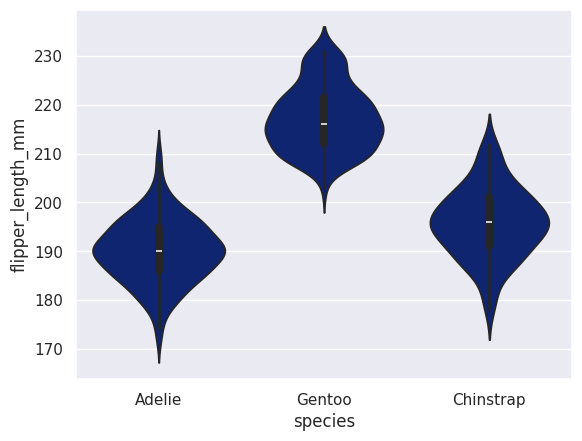

In [8]:
sns.violinplot(x='species', y='flipper_length_mm',
               data=penguins_df)
plt.show()

Al igual que los boxplots, nosotros podemos separar cada *violinplot* según el parámetro `hue`. Adicionalmente, nosotros podemos utilizar el parámetro `split=True` en conjunto con `hue` para poder presentar de forma divida en un mismo violin, las distintas distribuciones por la que estamos separando según la columna `hue`:

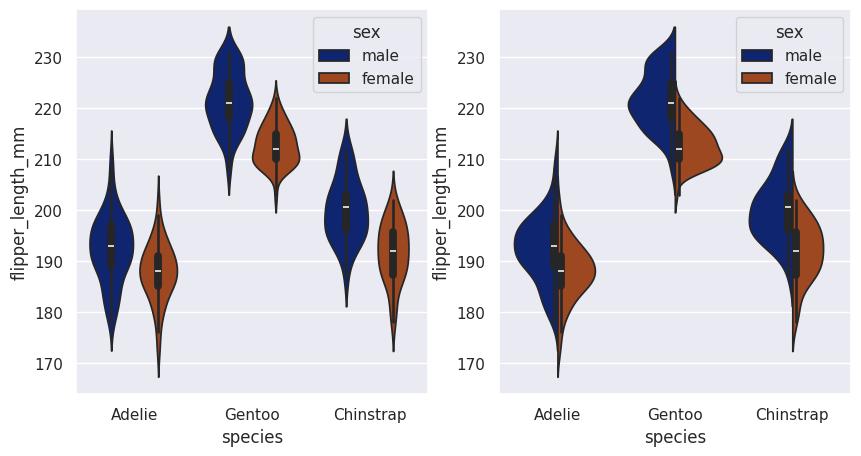

In [9]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.violinplot(x='species', y='flipper_length_mm', data=penguins_df, hue='sex', ax = ax[0])
sns.violinplot(x='species', y='flipper_length_mm', data=penguins_df, hue='sex', split=True, ax = ax[1])
plt.show()

## <font color='blue'>__Diagramas de Líneas (lineplot)__</font>

Para este tipo de gráfico vamos a utilizar el set de datos de la temperatura y el método `sns.lineplot`. Tal como el método de `sns.barplot`, `Seaborn` si es que tiene la oportunidad, va a hacer agregación de los datos dependiendo de cómo nosotros presentemos los datos, el uso de los parametros `hue` y posibles valores dependientes de categorías (en este caso, como tenemos 8 ciudades de Australia, vamos a tener 8 mediciones de temperatura para cada día).

[Documentación Lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html?highlight=lineplot#seaborn.lineplot)


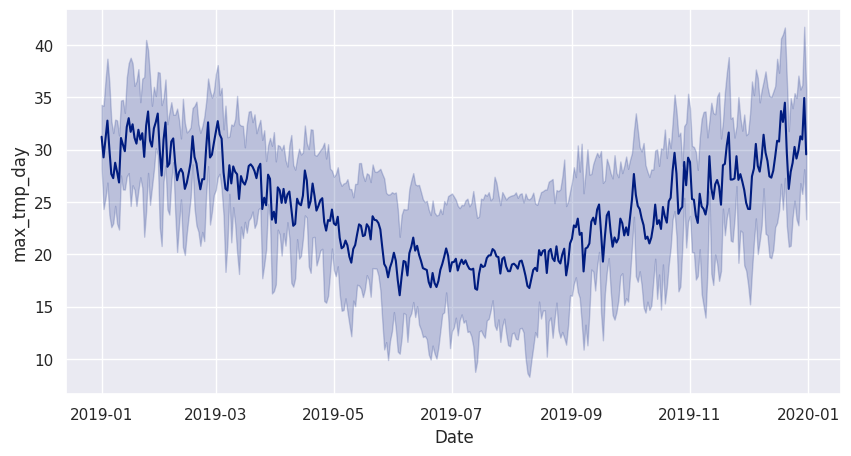

In [10]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Date', y='max_tmp_day', data=temps_df, errorbar='sd') # Definimos el Intervalo de confianza como la desviación estandar
plt.show()

## <font color='blue'>__Ejercicios__</font>

### <font color='green'>__Actividad 1:__</font>

Para esta dinámica revisitaremos el set de datos de precios de casa de King County Housing (VD08.csv). Realizaremos visualizaciones sencillas utilizando el conocimiento recientemente adquirido:

- Graficar la matriz de correlación para las distintas variables numéricas **nota:** el parámetro `fmt='.2f'` transformara el texto de anotaciones a 2 decimales máximo
- Utilizando subplots genere 4 histogramas de distintas variables presentes en el set de datos
- Utilizando subplots genere 2 boxplots y dos violinplots, comparando el precio para distintas variables (como por ej: 'grade', 'view', 'waterfront', 'bedrooms',etc). **¿Qué puede observar de esto?**
- utilizando subplots, genere 2 lineplots
    - Precio de las casas a través de los años que fueron construidas
    - Precio de las casas a través de los años que fueron construidas pero separadas por la columna **waterfront**


In [11]:
path3 = '/content/drive/Othercomputers/Mi PC/Diplomado Ciencia de datos '+\
        'UDD/3. Análisis exploratorio/files/VD08.csv'
housing_df = pd.read_csv(path3)
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


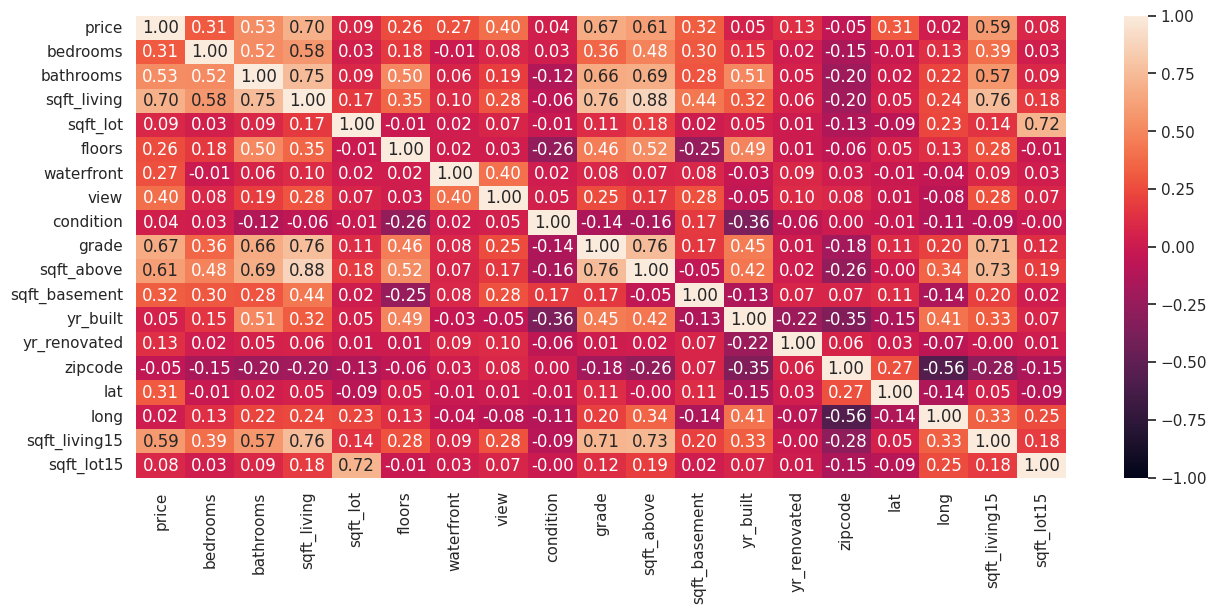

In [17]:
"""
Graficar la matriz de correlación para las distintas variables numéricas nota
el parámetro fmt='.2f' transformara el texto de anotaciones a 2 decimales máximo
"""
plt.figure(figsize=(15, 6))
sns.heatmap(
    housing_df.iloc[:,1:].corr(numeric_only=True), annot=True, fmt='.2f',
    vmin=-1, vmax=1)
plt.show()

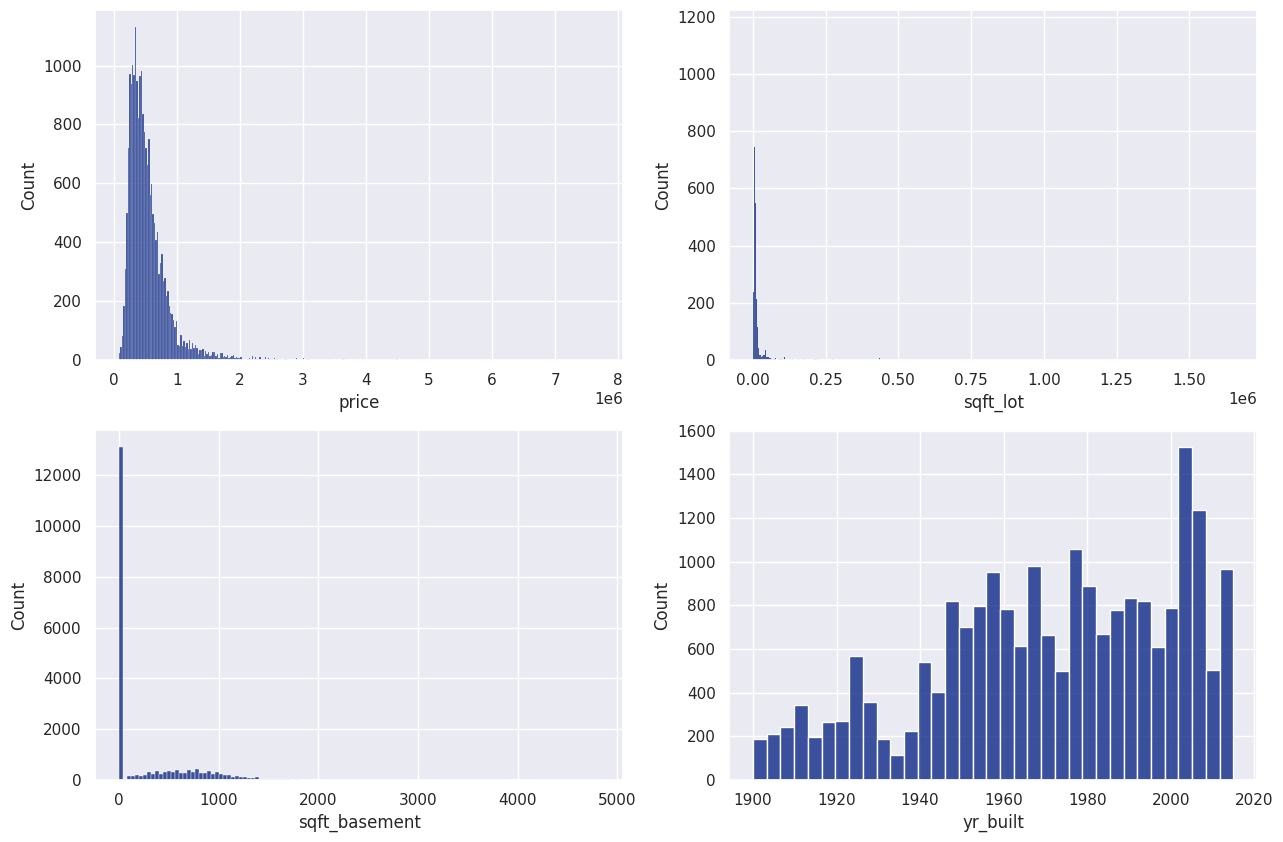

In [13]:
"""
Utilizando subplots genere 4 histogramas de distintas variables presentes en el
set de datos
"""

fig, axs = plt.subplots(2,2,figsize=(15,10))

sns.histplot(x='price', data=housing_df, ax=axs[0,0])

sns.histplot(x='sqft_lot', data=housing_df, ax=axs[0,1])

sns.histplot(x='sqft_basement', data=housing_df, ax=axs[1,0])

sns.histplot(x='yr_built', data=housing_df, ax=axs[1,1])

plt.show()

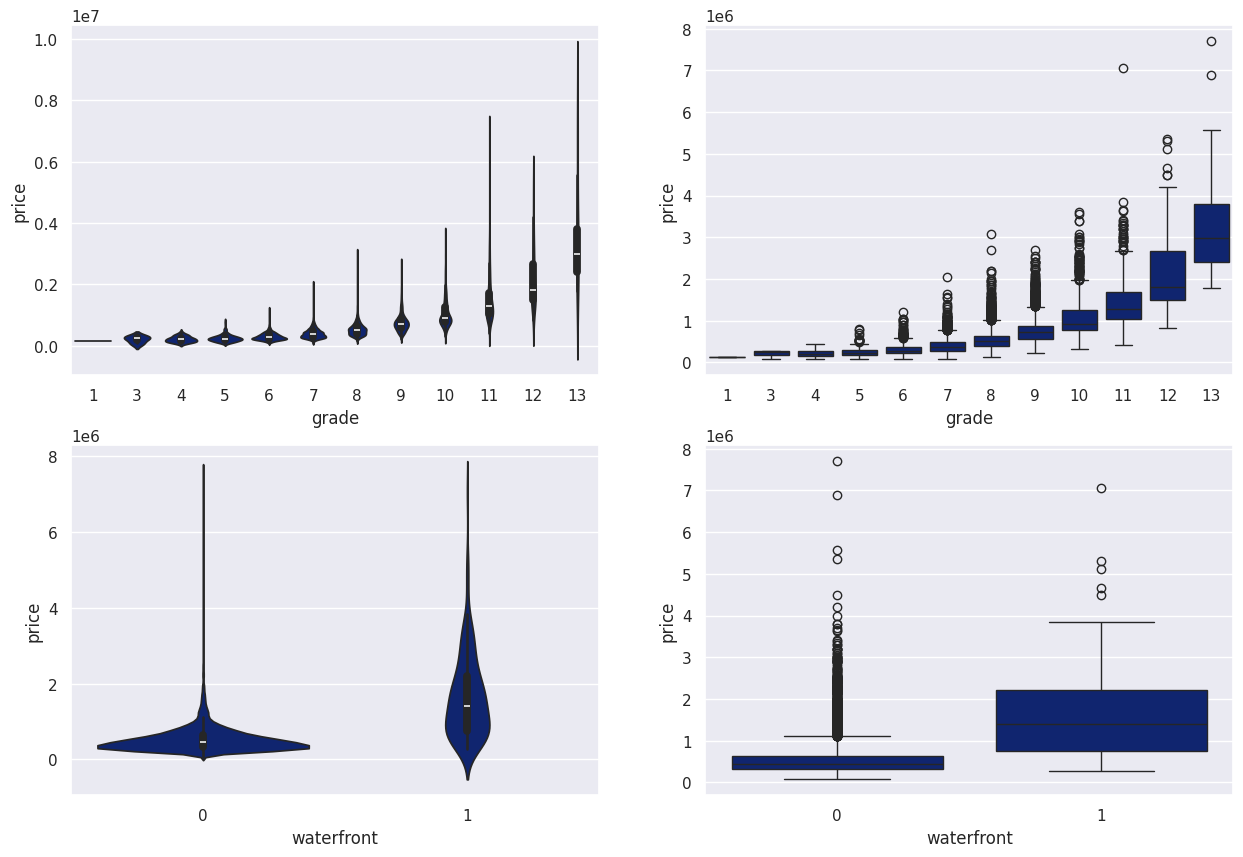

In [21]:
"""
Utilizando subplots genere 2 boxplots y dos violinplots, comparando el precio
para distintas variables (como por ej: 'grade', 'view', 'waterfront',
'bedrooms',etc). ¿Qué puede observar de esto?
"""

fig, axs = plt.subplots(2,2, figsize=(15,10))

sns.violinplot(x='grade', y='price', data=housing_df, ax=axs[0,0])

sns.boxplot(x='grade', y='price', data=housing_df, ax=axs[0,1])

sns.violinplot(x='waterfront', y='price', data=housing_df, ax=axs[1,0])

sns.boxplot(x='waterfront', y='price', data=housing_df, ax=axs[1,1])

plt.show()

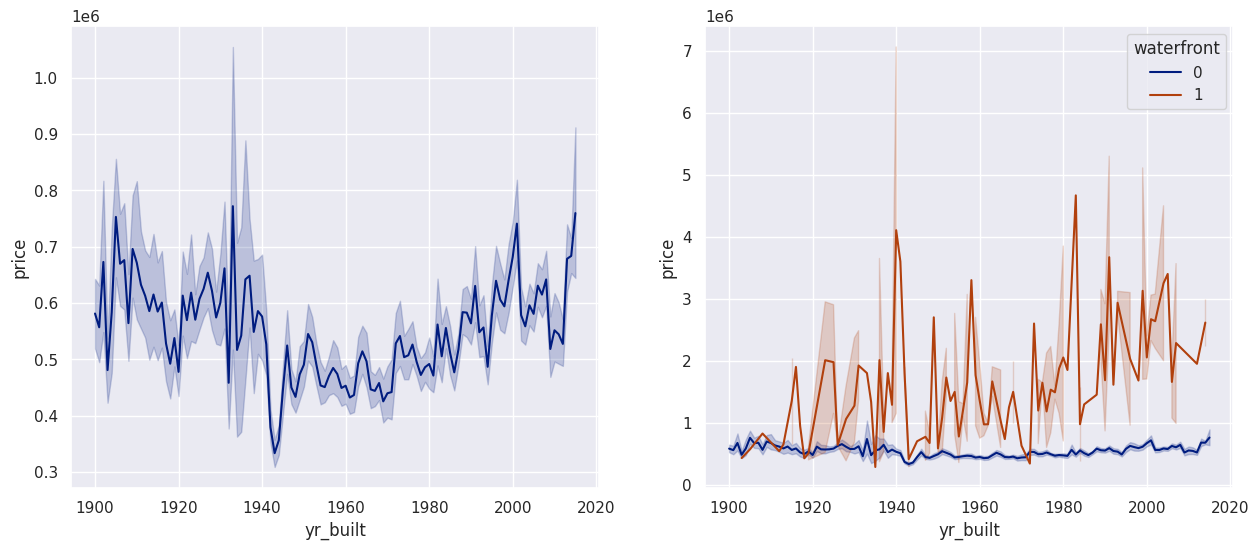

In [15]:
"""
Utilizando subplots, genere 2 lineplots:
    - Precio de las casas a través de los años que fueron construidas
    - Precio de las casas a través de los años que fueron construidas pero
        separadas por la columna waterfront
"""
fig, axs = plt.subplots(1,2, figsize=(15,6))

sns.lineplot(x='yr_built', y='price',data=housing_df, ax=axs[0])

sns.lineplot(x='yr_built', y='price',data=housing_df, hue='waterfront', ax=axs[1])

plt.show()

<font color='green'>Fin actividad 1</font>